<a href="https://colab.research.google.com/github/TurboPug2101/eAuto_/blob/main/eAuto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

#Import the libraries
import zipfile
import os
import pandas as pd
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/eAuto_photos.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
def count_files_in_folder(folder_path):
    count = 0

    for root, dirs, files in os.walk(folder_path):
        count += len(files)

    return count

In [ ]:

main_folder_path = '/tmp/photos/'

# Create empty lists to store folder names and counts
folder_names = []
num_files_list = []

# Iterate over subfolders
for root, dirs, files in os.walk(main_folder_path):
    for dir in dirs:
        folder_path = os.path.join(root, dir)
        num_files = count_files_in_folder(folder_path)

        folder_names.append(folder_path)
        num_files_list.append(num_files)

# Create a DataFrame to display the results
df = pd.DataFrame({'Folder': folder_names, 'Num Files': num_files_list})

# Display the DataFrame
print(df)

                   Folder  Num Files
0      /tmp/photos/Honday         50
1      /tmp/photos/Nissan        542
2     /tmp/photos/Renault        584
3        /tmp/photos/Ford        597
4      /tmp/photos/Suzuki        578
5  /tmp/photos/Volkswagen        252
6      /tmp/photos/Toyota        621
7        /tmp/photos/Tata        500
8     /tmp/photos/Hyundai        556


In [ ]:
Total = df['Num Files'].sum()
print(Total)

4280


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

#Import the libraries
import zipfile
import os
import pandas as pd
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/eAuto_photos2.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp2') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:

len(os.listdir('/tmp2/eAuto_photos2/photos/'))


9

In [ ]:
main_folder_path = '/tmp2/eAuto_photos2/photos/'

# Create empty lists to store folder names and counts
folder_names = []
num_files_list = []

# Iterate over subfolders
for root, dirs, files in os.walk(main_folder_path):
    for dir in dirs:
        folder_path = os.path.join(root, dir)
        num_files = count_files_in_folder(folder_path)

        folder_names.append(folder_path)
        num_files_list.append(num_files)

# Create a DataFrame to display the results
df = pd.DataFrame({'Folder': folder_names, 'Num Filess': num_files_list})

# Display the DataFrame
print(df)

                                  Folder  Num Filess
0      /tmp2/eAuto_photos2/photos/Honday          37
1      /tmp2/eAuto_photos2/photos/Nissan         319
2     /tmp2/eAuto_photos2/photos/Renault         373
3        /tmp2/eAuto_photos2/photos/Ford         345
4      /tmp2/eAuto_photos2/photos/Suzuki         268
5  /tmp2/eAuto_photos2/photos/Volkswagen         221
6      /tmp2/eAuto_photos2/photos/Toyota         330
7        /tmp2/eAuto_photos2/photos/Tata         184
8     /tmp2/eAuto_photos2/photos/Hyundai         392


In [ ]:
Total2 = df['Num Filess'].sum()
print(Total2)

2469


# **PREVIOUS COUNT WAS 4280 BUT AFTER CLEANING THE DATASET(REMOVING UNUSABLE IMAGES ) WE ARE LEFT WITH 2469 IMAGES**

2) THE DATASET IS STILL BIG ENOUGH TO TRAIN ML MODELS


3) THE DATASET REQUIRES RESIZING OF IMAGES ,
THE CURRENT DATASET HAD ALOT OF IRRELEVENT PHOTOS .
MANY PHOTOS HAVE THE LOGOS BLURRED WHICH CAN BE A CHALLENGE

#  WE WILL PERFORM STANDARDIZATION TO THE DATASET TO TRAIN THE MODEL BETTER . WE CANNOT MANUALLY EDIT IMAGES.
SOME DATA AUGMENTATION CAN BE DONE


# ** TASK 2 **

---



---





In [ ]:
from PIL import Image

In [ ]:
dataset_dir ='/tmp2/eAuto_photos2/photos/';

In [ ]:
# for folder_name in os.listdir(dataset_dir):
folder_path = "/tmp2/eAuto_photos2/photos/Honday/"
if os.path.isdir(folder_path):
        # Iterate over each image file in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg") :
                image_path = os.path.join(folder_path, filename)
                # Open the image
                image = Image.open(image_path)
                # Get the size (width and height) of the image
                width, height = image.size


                print(f"Width: {width}px",f"Height: {height}px")



Width: 860px Height: 556px
Width: 720px Height: 720px
Width: 768px Height: 500px
Width: 500px Height: 500px
Width: 800px Height: 600px
Width: 1170px Height: 780px
Width: 2048px Height: 1344px
Width: 1170px Height: 780px
Width: 768px Height: 576px
Width: 800px Height: 600px
Width: 720px Height: 720px
Width: 800px Height: 600px
Width: 720px Height: 720px
Width: 400px Height: 250px
Width: 1600px Height: 1600px
Width: 600px Height: 450px
Width: 1000px Height: 1000px
Width: 768px Height: 576px
Width: 1920px Height: 1080px
Width: 1440px Height: 959px
Width: 1600px Height: 1200px
Width: 1024px Height: 683px
Width: 500px Height: 500px
Width: 300px Height: 300px
Width: 800px Height: 600px
Width: 448px Height: 448px
Width: 640px Height: 480px
Width: 700px Height: 525px
Width: 800px Height: 600px
Width: 875px Height: 581px
Width: 1600px Height: 1200px
Width: 444px Height: 418px
Width: 800px Height: 600px
Width: 448px Height: 448px


In [ ]:
def smart_crop(image, target_aspect_ratio):
    width, height = image.size
    current_aspect_ratio = width / float(height)

    if current_aspect_ratio > target_aspect_ratio:
        new_width = int(target_aspect_ratio * height)
        left = (width - new_width) // 2
        right = left + new_width
        box = (left, 0, right, height)
    else:
        new_height = int(width / target_aspect_ratio)
        upper = (height - new_height) // 2
        lower = upper + new_height
        box = (0, upper, width, lower)

    cropped_image = image.crop(box)
    return cropped_image


In [ ]:

dataset_dir = "/tmp2/eAuto_photos2/photos/Honday/"

# for folder_name in os.listdir(dataset_dir):

folder_path = "/tmp2/eAuto_photos2/photos/Honday/"
# if os.path.isdir(folder_path):
#         print("hheloow")
        # Iterate over each image file in the folder
for filename in os.listdir(folder_path):
            if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
                image_path = os.path.join(folder_path, filename)
                image = Image.open(image_path)
                # Perform cropping on the image
               # print("hheloow")
                cropped_image = smart_crop(image, target_aspect_ratio)
              #  print("hheloow")
                # Save the cropped image with a new filename
                cropped_filename = "cropped_" + filename
                cropped_image_path = os.path.join(folder_path, cropped_filename)
                cropped_image.save(cropped_image_path)

                # Print the size of the cropped image
                cropped_width, cropped_height = cropped_image.size


In [ ]:
# for folder_name in os.listdir(dataset_dir):
folder_path = "/tmp2/eAuto_photos2/photos/Honday/"
if os.path.isdir(folder_path):
        # Iterate over each image file in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg") :
                image_path = os.path.join(folder_path, filename)
                # Open the image
                image = Image.open(image_path)
                # Get the size (width and height) of the image
                width, height = image.size


                print(f"Width: {width}px",f"Height: {height}px")



# **THE CROPPING FUNCTION WORKS PROPERLY**

In [ ]:


dataset_dir = "/tmp2/eAuto_photos2/photos/"

# Define the desired aspect ratio for the cropped images
target_aspect_ratio = 1.0

# Iterate over each folder in the dataset directory
for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)
    if os.path.isdir(folder_path):
        # Iterate over each image file in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg") or filename.endswith(".png")or filename.endswith(".jpeg"):
                image_path = os.path.join(folder_path, filename)
                image = Image.open(image_path)
                cropped_image = smart_crop(image, target_aspect_ratio)
                # Save the cropped image to a new location or overwrite the original file
                cropped_image.save(image_path)
    print("cropping done")

cropping done
cropping done
cropping done
cropping done
cropping done
cropping done
cropping done
cropping done
cropping done


# **Appropriate smart copping has been done**

---



In [ ]:
from PIL import Image

folder_path = "/tmp2/eAuto_photos2/photos/"  # Replace with the actual path to the folder containing images

# Iterate over each image file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)

        # Perform image sharpening
        sharpened_image = image.filter(ImageFilter.SHARPEN)

        # Save the sharpened image
        sharpened_image_path = os.path.join(folder_path, "shar pened_" + filename)
        sharpened_image.save(sharpened_image_path)


# *SHARPENING IS DONE*

# **PERFORMING DATA AUGMENTATION**

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen= ImageDataGenerator(
    rotation_range=30,
    shear_range= 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
)

In [ ]:
destination_folder = "/tmp2/eAuto_photos2/photos_aug"
os.makedirs(destination_folder, exist_ok=True)
print("created destination")

created destination


In [ ]:
from PIL import Image
import random
import cv2

In [ ]:
def augment_images(dir_name):
    input_dir = f'/tmp2/eAuto_photos2/photos/{dir_name}'
    output_dir = input_dir

    datagen = ImageDataGenerator(
        rotation_range=20,  # Randomly rotate images by 20 degrees
        width_shift_range=0.1,  # Randomly shift the width by 10%
        height_shift_range=0.1,  # Randomly shift the height by 10%
        horizontal_flip=True,  # Randomly flip images horizontally
        vertical_flip=True,  # Randomly flip images vertically
        zoom_range=0.1,  # Randomly zoom images by 10%
        brightness_range=[0.8, 1.2]  # Randomly adjust the brightness
    )

    file_list = os.listdir(input_dir)
    total_imgs = len(file_list) # total number of images in the given directory

    while total_imgs != 501:
        random_img = random.choice(file_list)
        img_path = os.path.join(input_dir, random_img)
        img = cv2.imread(img_path)

        # img = img.reshape((1,) + img.shape)
        if img is not None:
          # Perform image processing operations
          img = img.reshape((1,) + img.shape)

        aug_imgs = datagen.flow(img, batch_size=1, save_to_dir=output_dir, save_format='png', save_prefix='aug')
        aug_img = aug_imgs.next()
        total_imgs+=1

In [ ]:
source_folder = "/tmp2/eAuto_photos2/photos/"

for root, dirs, files in os.walk(source_folder):
    for dir in dirs:
      augment_images(dir)

In [ ]:
main_folder_path = '/tmp2/eAuto_photos2/photos/'

# Create empty lists to store folder names and counts
folder_names = []
num_files_list = []

# Iterate over subfolders
for root, dirs, files in os.walk(main_folder_path):
    for dir in dirs:
        folder_path = os.path.join(root, dir)
        num_files = count_files_in_folder(folder_path)

        folder_names.append(folder_path)
        num_files_list.append(num_files)

# Create a DataFrame to display the results
df = pd.DataFrame({'Folder': folder_names, 'Num Filess': num_files_list})

# Display the DataFrame
print(df)

                                  Folder  Num Filess
0        /tmp2/eAuto_photos2/photos/Ford         345
1  /tmp2/eAuto_photos2/photos/Volkswagen         221
2        /tmp2/eAuto_photos2/photos/Tata         184
3     /tmp2/eAuto_photos2/photos/Hyundai         392
4      /tmp2/eAuto_photos2/photos/Toyota         330
5      /tmp2/eAuto_photos2/photos/Suzuki         268
6      /tmp2/eAuto_photos2/photos/Honday          37
7      /tmp2/eAuto_photos2/photos/Nissan         319
8     /tmp2/eAuto_photos2/photos/Renault         373


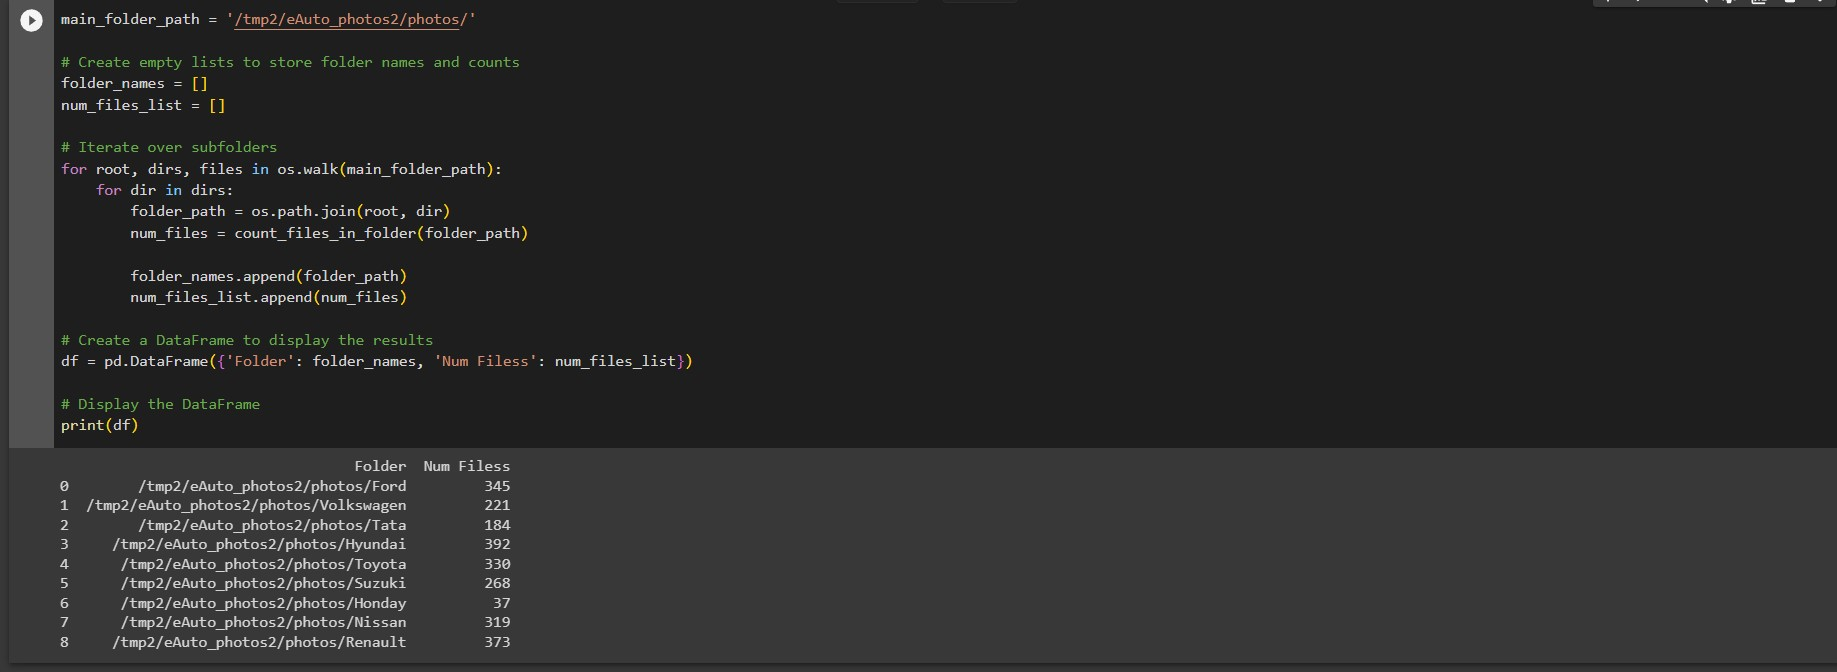

In [ ]:
main_folder_path = '/tmp2/eAuto_photos2/photos/'

# Create empty lists to store folder names and counts
folder_names = []
num_files_list = []

# Iterate over subfolders
for root, dirs, files in os.walk(main_folder_path):
    for dir in dirs:
        folder_path = os.path.join(root, dir)
        num_files = count_files_in_folder(folder_path)

        folder_names.append(folder_path)
        num_files_list.append(num_files)

# Create a DataFrame to display the results
df = pd.DataFrame({'Folder': folder_names, 'Num Filess': num_files_list})

# Display the DataFrame
print(df)

                                  Folder  Num Filess
0        /tmp2/eAuto_photos2/photos/Ford         501
1  /tmp2/eAuto_photos2/photos/Volkswagen         501
2        /tmp2/eAuto_photos2/photos/Tata         501
3     /tmp2/eAuto_photos2/photos/Hyundai         501
4      /tmp2/eAuto_photos2/photos/Toyota         499
5      /tmp2/eAuto_photos2/photos/Suzuki         498
6      /tmp2/eAuto_photos2/photos/Honday         490
7      /tmp2/eAuto_photos2/photos/Nissan         500
8     /tmp2/eAuto_photos2/photos/Renault         501


# **Data Augmentation has been implemented !**

# **BEFORE AUGMENTATIO NO OF PHOTOS=2469**
# **AFTER AUGMENTATION NO OF PHOTOS=4492**

PROBLEMS FACED

<ipython-input-13-c028ccf157a6> in augment_images(dir_name)
     21         img = cv2.imread(img_path)
     22
---> 23         img = img.reshape((1,) + img.shape)
     24         aug_imgs = datagen.flow(img, batch_size=1, save_to_dir=output_dir, save_format='png', save_prefix='aug')
     25         aug_img = aug_imgs.next()

AttributeError: 'NoneType' object has no attribute 'reshape'



---



---
SOLUTION:
 if img is not None:
          # Perform image processing operations
          img = img.reshape((1,) + img.shape)
    




---



---
# **TASK 3**



---

---



# I have chosen to use CNN MODEL to recognize the car brand

Reasons to choose CNN:



---




* **Spatial Hierarchical Features:** CNNs excel at capturing complex visual patterns, making them ideal for recognizing distinctive car features like wheels, windows, and headlights.

* **Translation Invariance:** CNNs can identify car features regardless of their position in the image, accommodating variations in car placement.

* **Parameter Sharing:** CNNs reduce the number of parameters, making them efficient for processing large car images without excessive computational resources.

* **Hierarchical Learning:** CNNs learn hierarchical representations, gradually capturing simple to complex features in car images.

* **Robustness to Variations:** CNNs are robust to lighting, orientation, and occlusion variations, enabling accurate classification of cars in real-world scenarios.


In [ ]:
import numpy as np
import tensorflow as tf
tf.keras.layers.BatchNormalization
#from keras.layers.normalization import BatchNormalization

from tensorflow import keras
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import Binarizer
#from keras.layers.normalization import tf.keras.layers.BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
keras.preprocessing.image.img_to_array
from keras import preprocessing
from tensorflow.keras.utils import img_to_array

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = '/tmp2/eAuto_photos2/'
width=256
height=256
depth=3

In [ ]:
def convert_image_to_array(image_dir):
    default_image_size = (256, 256)
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)
            return tf.keras.preprocessing.image.img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)
    print(root_dir)
    print(f"{directory_root}")
    for i in range(1) :
        car_folder_list = listdir(f"{directory_root}/{'photos'}")
        #print(plant_disease_folder_list)

#         for disease_folder in plant_disease_folder_list :
#             # remove .DS_Store from list
#             if disease_folder == ".DS_Store" :
#                 plant_disease_folder_list.remove(disease_folder)
#         print()
        for car_folder in car_folder_list:
            print(f"[INFO] Processing {car_folder} ...")
            car_image_list = listdir(f"{directory_root}/{'photos'}/{car_folder}")

            for single_car_image in car_image_list :
                if single_car_image == ".DS_Store" :
                    car_image_list.remove(single_car_image)
            #print(plant_disease_image_list[:5])

            for image in car_image_list[:200]:
                image_directory = f"{directory_root}/{'photos'}/{car_folder}/{image}"
                if image_directory.endswith(".png") == True or image_directory.endswith(".PNG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(car_folder)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
Error : [Errno 2] No such file or directory: '/tmp2/eAuto_photos2/'


In [ ]:
image_size = len(image_list)
image_size

0

In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

ValueError: ignored

In [ ]:
print(label_binarizer.classes_)

In [ ]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [ ]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42)

In [ ]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True,
    fill_mode="nearest")

In [ ]:
model = keras.Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(tf.keras.layers.BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(tf.keras.layers.BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(tf.keras.layers.BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(tf.keras.layers.BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(tf.keras.layers.BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [ ]:
model.summary()

In [ ]:
# opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# # distribution
model.compile(loss="binary_crossentropy", optimizer='Adam',metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [ ]:
history = model.fit(
    x_train,y_train,epochs=1
    )

3/3 [==============================] - 16s 4s/step - loss: 1.2177 - accuracy: 0.1970


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
1/1 [==============================] - 1s 836ms/step - loss: 0.7076 - accuracy: 0.1176
Test Accuracy: 11.764705926179886


In [ ]:
import pickle

In [ ]:
print("[INFO] Saving model...")
#model_path = '/model.pkl'

model.save('car_model.h5')


[INFO] Saving model...


In [ ]:
import os

model_file = 'car_model.h5'
current_directory = os.getcwd()
model_path = os.path.join(current_directory, model_file)

if os.path.exists(model_path):
    print(f"The model file '{model_file}' exists in the current directory.")
else:
    print(f"The model file '{model_file}' does not exist in the current directory.")

print(model_path)


The model file 'car_model.h5' exists in the current directory.
/content/car_model.h5


In [ ]:
loaded_model = pickle.load(open('label_transform.pkl', 'rb'))

In [ ]:
loaded_model = pickle.load(open('/content/cnn_model.pkl', 'rb'))

In [ ]:
image_dir="/content/frontfacingHyundaicar7.jpeg"

im=convert_image_to_array(image_dir)
np_image_li = np.array(im, dtype=np.float16) / 225.0
npp_image = np.expand_dims(np_image_li, axis=0)
npp_image.shape

(1, 256, 256, 3)

In [ ]:
import os

file_path = '/content/car_model.h5'  # Update with the correct file path

if os.path.exists(file_path):
    if os.access(file_path, os.R_OK):
        print("File exists and has read permissions.")
    else:
        print("File exists but does not have read permissions.")
else:
    print("File does not exist.")

File exists and has read permissions.


In [ ]:
if npp_image is not None and npp_image.shape[0] != 0:
    # Expand dimensions to match the expected input shape of the model
    npp_image = np.expand_dims(npp_image, axis=0)

    # Load and use the sequential model
    curr_dir=os.getcwd()
    model = tf.keras.models.load_model('/content/car_model.h5')
    #npp_image = np.squeeze(npp_image, axis=0)

    result = model.predict(npp_image)

    # Print the maximum prediction score and the full prediction array
    print(max(result[0]))
    print(result[0])
else:
    print("Error: Image conversion failed or empty array.")

1/1 [==============================] - 0s 194ms/step
0.33759698
[0.02773857 0.08364464 0.33759698 0.08194254 0.09691073 0.0561595
 0.08274645 0.13034494 0.10291561]


In [ ]:
itemindex = np.where(result==np.max(result))
print("probability:"+str(np.max(result))+"\n"+label_binarizer.classes_[itemindex[1][0]])

probability:0.33759698
Hyundai


In [ ]:
print("Plotting accuracy versus epoch")
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
print("The model is being evaluated")
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)
print("The accuracy of the model is:")
print(test_acc)

# **DUE TO JUST 1 EPOCH,AND IMAGES NOT AUGMENTED,THE MODEL HAS AN ACCURACY OF 19% AND PREDICTS THE HYUNDAI CAR CORRECTLY WITH A PROBABILITY OF 33.7%**